In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key

import requests
requests.__version__

'2.26.0'

In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [16]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [17]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [18]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

okhotsk ru
cape town za
busselton au
pinawa ca
east london za
vaini to
el tigre ve
cape town za
saint-philippe re
punta arenas cl
punta arenas cl
luanda ao
clyde river ca
ushuaia ar
talnakh ru
bredasdorp za
elliot lake ca
komsomolskiy ru
busselton au
albany au
mar del plata ar
jijiga et
ushuaia ar
port macquarie au
port alfred za
cherskiy ru
palmer us
cidreira br
sao miguel do araguaia br
rikitea pf
hithadhoo mv
brae gb
kazerun ir
arraial do cabo br
kaitangata nz
cape town za
busselton au
fairbanks us
padang id
mataura pf
carnarvon au
tiarei pf
camocim br
longyearbyen sj
saint-philippe re
araouane ml
hithadhoo mv
evensk ru
jieshi cn
saiha in
lebu cl
punta arenas cl
manta ec
ushuaia ar
vila velha br
punta arenas cl
hobart au
narsaq gl
ngukurr au
sao joao da barra br
mataura pf
bluff nz
kirakira sb
kyakhta ru
tsihombe mg
kodiak us
verkhnyaya inta ru
tuktoyaktuk ca
nome us
lata sb
torbay ca
nizhneyansk ru
carnarvon au
havre-saint-pierre ca
hobart au
chicama pe
ushuaia ar
beringovskiy ru
d

hilo us
tuktoyaktuk ca
puerto ayora ec
tuktoyaktuk ca
marcona pe
mataura pf
jamestown sh
bredasdorp za
katobu id
mataura pf
el alto pe
canala nc
yellowknife ca
albany au
qaanaaq gl
butaritari ki
busselton au
punta arenas cl
albany au
rikitea pf
labuhan id
chuy uy
kenai us
atuona pf
hilo us
hithadhoo mv
sinnamary gf
rikitea pf
matara lk
senno by
ambilobe mg
salalah om
ixtapa mx
albany au
jamestown sh
punta arenas cl
sao filipe cv
mount isa au
qaanaaq gl
hovd mn
puerto ayora ec
hermanus za
avarua ck
ponta do sol cv
taolanaro mg
mareeba au
hami cn
dingle ie
hilo us
albany au
iqaluit ca
provideniya ru
vaini to
busselton au
esperance au
opuwo na
mataura pf
angoram pg
gushikawa jp
vaini to
butaritari ki
ushuaia ar
hobart au
mount isa au
bredasdorp za
mataura pf
jieshou cn
georgetown sh
port augusta au
aklavik ca
te anau nz
rio verde de mato grosso br
aklavik ca
mataura pf
san-pedro ci
dalby au
albany au
moerai pf
qaanaaq gl
carlagan ph
guerrero negro mx
sulangan ph
shakawe bw
mataura pf
avar

butaritari ki
grand river south east mu
ponta do sol cv
nome us
korla cn
yulara au
goderich sl
lubango ao
namibe ao
porto novo cv
provideniya ru
saint george bm
vaini to
sinnamary gf
souillac mu
kapaa us
lavrentiya ru
vila franca do campo pt
lodwar ke
pinsk by
sharjah ae
cherskiy ru
castro cl
norman wells ca
ilulissat gl
thompson ca
ponta do sol cv
balarampur in
saint anthony ca
ukiah us
chokurdakh ru
sorong id
albany au
kirakira sb
mataura pf
birin dz
ulaangom mn
sri aman my
cape town za
chokurdakh ru
vao nc
tuktoyaktuk ca
atuona pf
katangli ru
busselton au
saskylakh ru
goteborg se
pacific grove us
san quintin mx
cape town za
tonantins br
busselton au
axim gh
upernavik gl
katsuura jp
busselton au
jieshi cn
two hills ca
kolosovka ru
clinton us
hearst ca
yellowknife ca
nizhniy tsasuchey ru
apastovo ru
ribeira grande pt
galesong id


In [19]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [56]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a82f7b6775c2617f5a2336fef2eb2ec7


In [57]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a82f7b6775c2617f5a2336fef2eb2ec7&q=Boston


In [68]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
cc = city_weather.json()
cc

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 47.68,
  'feels_like': 40.35,
  'temp_min': 44.65,
  'temp_max': 50.79,
  'pressure': 998,
  'humidity': 43},
 'visibility': 10000,
 'wind': {'speed': 21, 'deg': 0, 'gust': 0},
 'clouds': {'all': 75},
 'dt': 1648411781,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1648377318,
  'sunset': 1648422221},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [31]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 26 of Set 54 | okhotsk
Processing Record 27 of Set 54 | cape town
Processing Record 28 of Set 54 | busselton
Processing Record 29 of Set 54 | pinawa
Processing Record 30 of Set 54 | east london
Processing Record 31 of Set 54 | vaini
Processing Record 32 of Set 54 | el tigre
Processing Record 33 of Set 54 | saint-philippe
Processing Record 34 of Set 54 | punta arenas
Processing Record 35 of Set 54 | luanda
Processing Record 36 of Set 54 | clyde river
Processing Record 37 of Set 54 | ushuaia
Processing Record 38 of Set 54 | talnakh
Processing Record 39 of Set 54 | bredasdorp
Processing Record 40 of Set 54 | elliot lake
Processing Record 41 of Set 54 | komsomolskiy
Processing Record 42 of Set 54 | albany
Processing Record 43 of Set 54 | mar del plata
Processing Record 44 of Set 54 | jijiga
Processing Record 45 of Set 54 | port macquarie
Processing Record 46 of Set 54 | port alfred
Processing Record 47 of Set 54 | cherskiy
Processing Record 48 of Set 54 | palmer
Processin

Processing Record 33 of Set 57 | yulara
Processing Record 34 of Set 57 | wegrow
Processing Record 35 of Set 57 | dingle
Processing Record 36 of Set 57 | tonj
Processing Record 37 of Set 57 | belushya guba
City not found. Skipping...
Processing Record 38 of Set 57 | sao filipe
Processing Record 39 of Set 57 | bend
Processing Record 40 of Set 57 | lere
Processing Record 41 of Set 57 | taolanaro
City not found. Skipping...
Processing Record 42 of Set 57 | pitimbu
Processing Record 43 of Set 57 | khatanga
Processing Record 44 of Set 57 | kavieng
Processing Record 45 of Set 57 | cyangugu
Processing Record 46 of Set 57 | labuhan
Processing Record 47 of Set 57 | sapiranga
Processing Record 48 of Set 57 | andros town
Processing Record 49 of Set 57 | acapulco
Processing Record 50 of Set 57 | marystown
Processing Record 1 of Set 58 | moussoro
Processing Record 2 of Set 58 | korsakovo
Processing Record 3 of Set 58 | sorland
Processing Record 4 of Set 58 | tiznit
Processing Record 5 of Set 58 | te

Processing Record 23 of Set 61 | senno
Processing Record 24 of Set 61 | salalah
Processing Record 25 of Set 61 | ixtapa
Processing Record 26 of Set 61 | mount isa
Processing Record 27 of Set 61 | hovd
Processing Record 28 of Set 61 | mareeba
Processing Record 29 of Set 61 | hami
Processing Record 30 of Set 61 | angoram
Processing Record 31 of Set 61 | gushikawa
Processing Record 32 of Set 61 | jieshou
Processing Record 33 of Set 61 | port augusta
Processing Record 34 of Set 61 | rio verde de mato grosso
Processing Record 35 of Set 61 | san-pedro
Processing Record 36 of Set 61 | dalby
Processing Record 37 of Set 61 | moerai
Processing Record 38 of Set 61 | carlagan
Processing Record 39 of Set 61 | guerrero negro
Processing Record 40 of Set 61 | sulangan
Processing Record 41 of Set 61 | shakawe
Processing Record 42 of Set 61 | poya
Processing Record 43 of Set 61 | tupik
Processing Record 44 of Set 61 | lompoc
Processing Record 45 of Set 61 | cognac
Processing Record 46 of Set 61 | ambovo

Processing Record 13 of Set 65 | jiaonan
Processing Record 14 of Set 65 | thaba-tseka
Processing Record 15 of Set 65 | maun
Processing Record 16 of Set 65 | san isidro
Processing Record 17 of Set 65 | mendoza
Processing Record 18 of Set 65 | kamyshlov
Processing Record 19 of Set 65 | coihaique
Processing Record 20 of Set 65 | bar harbor
Processing Record 21 of Set 65 | palanit
Processing Record 22 of Set 65 | terney
Processing Record 23 of Set 65 | kruisfontein
Processing Record 24 of Set 65 | capaci
Processing Record 25 of Set 65 | shuya
Processing Record 26 of Set 65 | kudahuvadhoo
Processing Record 27 of Set 65 | mutoko
Processing Record 28 of Set 65 | pogranichnyy
Processing Record 29 of Set 65 | chengde
Processing Record 30 of Set 65 | yarada
Processing Record 31 of Set 65 | kandalaksha
Processing Record 32 of Set 65 | leshukonskoye
Processing Record 33 of Set 65 | avera
Processing Record 34 of Set 65 | lasem
Processing Record 35 of Set 65 | shemonaikha
Processing Record 36 of Set

In [32]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Okhotsk,59.3833,143.3000,-2.49,85,34,11.97,RU,2022-03-27 17:50:42
1,Cape Town,-33.9258,18.4232,73.81,40,0,4.61,ZA,2022-03-27 17:50:42
2,Busselton,-33.6500,115.3333,58.21,70,0,14.56,AU,2022-03-27 17:50:43
3,Pinawa,50.1489,-95.8811,15.35,53,20,6.26,CA,2022-03-27 17:50:43
4,East London,-33.0153,27.9116,70.74,83,0,11.50,ZA,2022-03-27 17:50:43
5,Vaini,-21.2000,-175.2000,77.16,88,40,6.91,TO,2022-03-27 17:50:44
6,El Tigre,8.8875,-64.2454,86.47,49,100,12.97,VE,2022-03-27 17:50:44
7,Saint-Philippe,-21.3585,55.7679,80.19,87,90,9.22,RE,2022-03-27 17:50:44
8,Punta Arenas,-53.1500,-70.9167,51.91,54,0,23.02,CL,2022-03-27 17:50:21
9,Luanda,-8.8368,13.2343,84.20,74,20,14.97,AO,2022-03-27 17:48:59


In [35]:
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Okhotsk,RU,2022-03-27 17:50:42,59.3833,143.3000,-2.49,85,34,11.97
1,Cape Town,ZA,2022-03-27 17:50:42,-33.9258,18.4232,73.81,40,0,4.61
2,Busselton,AU,2022-03-27 17:50:43,-33.6500,115.3333,58.21,70,0,14.56
3,Pinawa,CA,2022-03-27 17:50:43,50.1489,-95.8811,15.35,53,20,6.26
4,East London,ZA,2022-03-27 17:50:43,-33.0153,27.9116,70.74,83,0,11.50
...,...,...,...,...,...,...,...,...,...
579,Clinton,US,2022-03-27 18:06:04,42.5870,-82.9199,29.97,56,75,17.27
580,Hearst,CA,2022-03-27 18:06:04,49.6835,-83.6665,4.66,78,100,12.37
581,Nizhniy Tsasuchey,RU,2022-03-27 18:06:05,50.5167,115.1333,25.00,64,13,5.97
582,Apastovo,RU,2022-03-27 18:06:05,55.2029,48.5109,26.89,90,65,12.95


In [38]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [42]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today


'03/27/22'

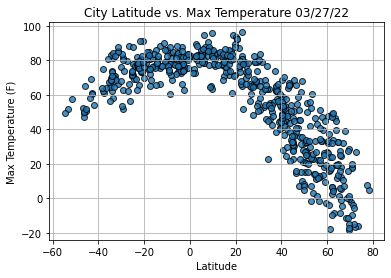

In [49]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()



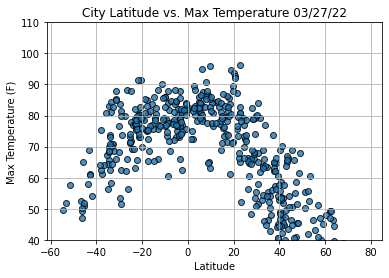

In [51]:

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(40,110)
plt.grid(True)
plt.show()

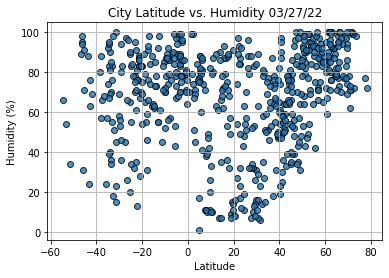

In [52]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

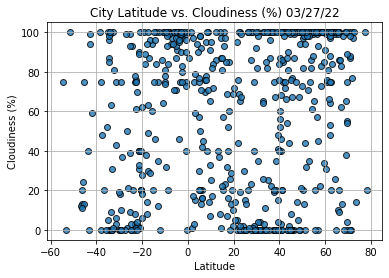

In [53]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

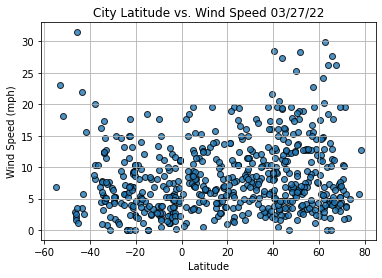

In [54]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [71]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

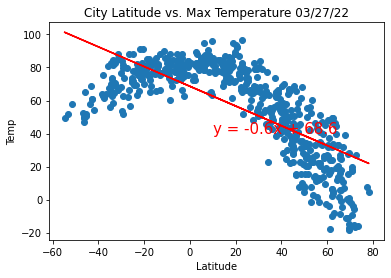

In [74]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(slope * lat + intercept) for lat in lats]

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create a scatter plot of the x and y values.
plt.scatter(lats, max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats, regress_values,"r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq,(10,40),fontsize=15, color="red")
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [91]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [77]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Okhotsk,RU,2022-03-27 17:50:42,59.3833,143.3000,-2.49,85,34,11.97
3,Pinawa,CA,2022-03-27 17:50:43,50.1489,-95.8811,15.35,53,20,6.26
6,El Tigre,VE,2022-03-27 17:50:44,8.8875,-64.2454,86.47,49,100,12.97
10,Clyde River,CA,2022-03-27 17:50:45,70.4692,-68.5914,-1.97,78,100,8.05
12,Talnakh,RU,2022-03-27 17:50:46,69.4865,88.3972,-0.69,86,55,4.43


In [80]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

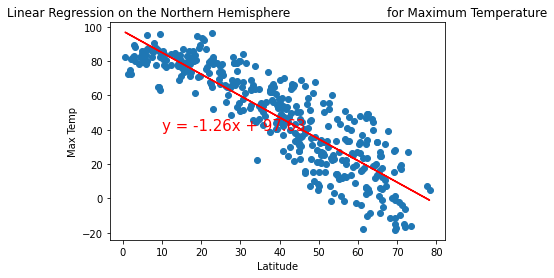

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

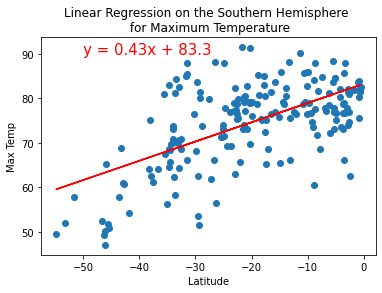

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

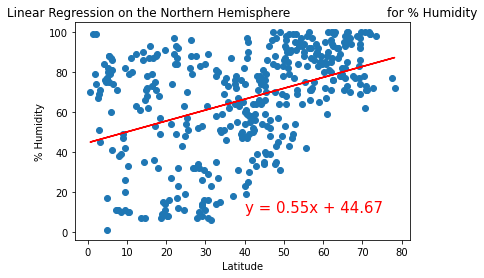

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

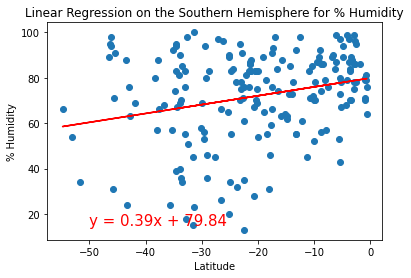

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

y = 0.46x + 41.99


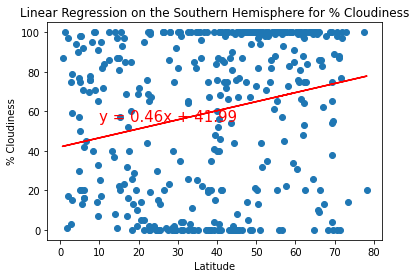

In [96]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness', (10,55))



y = 1.37x + 85.54


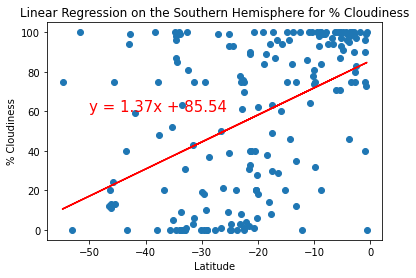

In [98]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

y = 0.01x + 8.41


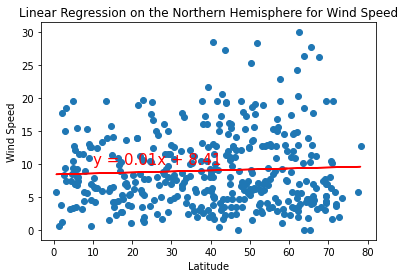

In [110]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(10,10))

y = -0.09x + 4.99


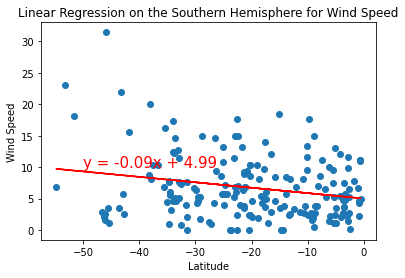

In [108]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,10))